<a href="https://colab.research.google.com/github/VikaK0828/Data-Science/blob/main/Piano_Music_Majors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Setting  
Out of the people who become music majors, what is the probability of a person studying music in college to be a piano performance major?

In [2]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 881.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


###Prior
I believe that the probability a person going into music school would study piano is quite small because there are so many majors offered at a music school, and piano is one of many many instruments, so I think that the percent chance is very small.

My assumption is that for every 24 students, 2 would choose piano to study and 22 would not.

<Axes: >

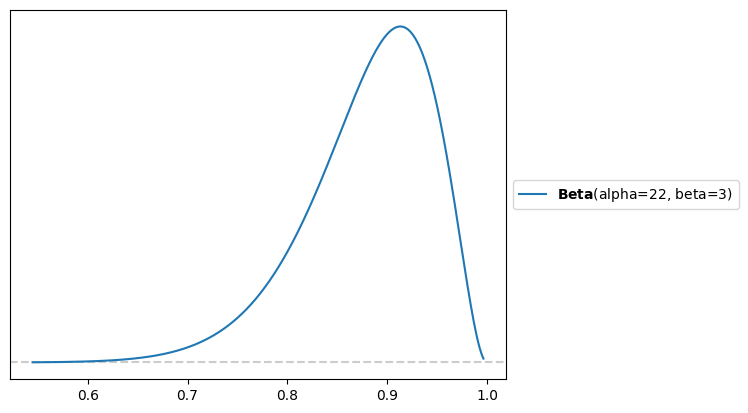

In [9]:
pz.Beta(alpha=22,beta=3).plot_pdf()

###Prediction with Prior


In [10]:

#store the prior distribution for the Free Throw (FT) percentage
FT_prior = pz.Beta(alpha=22,beta=3)

#preliz does not have a function that returns the mode, so I will use a formula
FT_prior_mode = (FT_prior.alpha - 1)/(FT_prior.alpha + FT_prior.beta - 2)

#the mean mean first, then median, and finally mode
FT_prior.mean(), FT_prior.median(), FT_prior_mode

(0.88, 0.8901316232431375, 0.9130434782608695)

###Data Given
We are going to be using the data given throughout 5 different years, analyzing he number of piano majors out of the total number of music majors.





Lets start with the general number of people enrolled to be a music major ...


###Music Major Enrollment

Fall 2014 - 108,586 students

Fall 2015 - 103,742 students

Fall 2016 - 104,900 students

Fall 2017 - 103,004 students

Fall 2018 - 101,942 students






Now lets look at out of the students in the previous data set, how many of them were piano majors.


###Piano Major Enrollment

Fall 2014 - 2,364 students

Fall 2015 - 2,075 students

Fall 2016 - 2,019 students

Fall 2017 - 1,864 students

Fall 2018 - 1,766 students

Using the given two data sets, we then find the percentages of students who were piano majors.

###Percentage Students who were Piano Majors

Fall 2014 - 2,346/108,586 = roughly 2.18%

Fall 2015 - 2,075/103,742 = roughly 2.00%

Fall 2016 - 2,019/104,900 = roughly 1.91%

Fall 2017 - 1,864/103,004 = roughly 1.81%

Fall 2018 - 1,766/101,942 = roughly 1.72%

On a graph, this is how the data would look like.

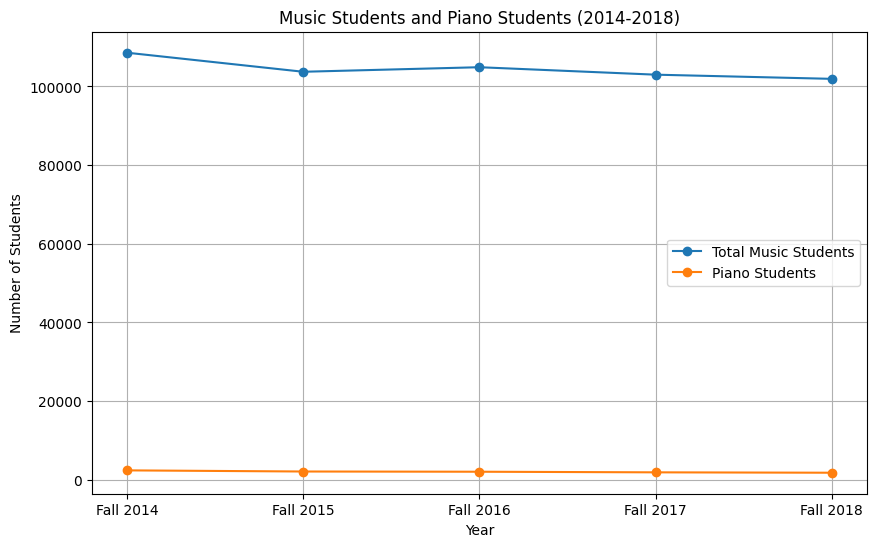

In [ ]:
years = ['Fall 2014', 'Fall 2015', 'Fall 2016', 'Fall 2017', 'Fall 2018']
total_students = [108586, 103742, 104900, 103004, 101942]
piano_students = [2364, 2075, 2019, 1864, 1766]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, total_students, marker='o', label='Total Music Students')
plt.plot(years, piano_students, marker='o', label='Piano Students')

# Adding title and labels
plt.title('Music Students and Piano Students (2014-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

As you can see, the trend of both lines does not seem to be changing that much. Although a big factor to see in the graph a trend in the piano major percentages being close to 2.0% which can lead you into making a guess that probably the trend will stay the same and the percentage will be 2.0%.

This can also be seen as a fraction of ....
2017/104435

###Making Prediction using the Data
Pt. 1



In [11]:
#prior information
alpha_old = 22
beta_old = 3

#likelihood info, or data from the NBA
k = 2017 #makes
n = 104435 #total attempts

#'analytic' here means that we found the solution directly using a closed form
# mathematical formula
analytic_FT = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

#Wembanyama' expected FT%. Mode and median are also acceptable, but note that I
#said 'expect', which techinally calls for the mean.
analytic_FT.mean()

0.01951943327589508

we can plot this on a graph like the following...

> Add blockquote



<Axes: >

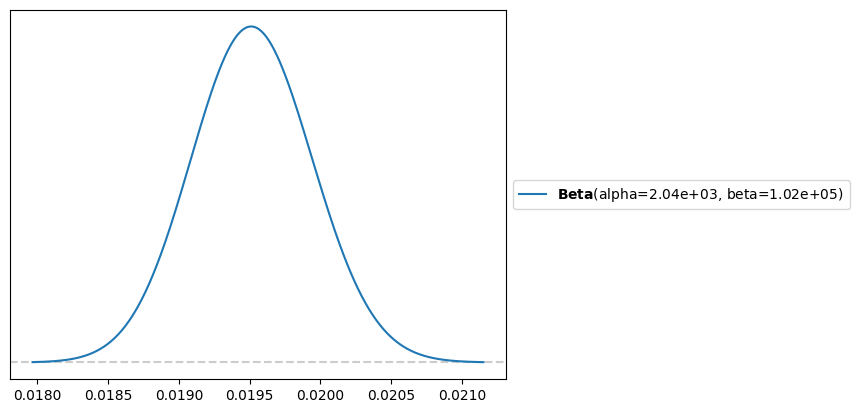

In [12]:
analytic_FT.plot_pdf()

###Making Predictions using the Data

Pt. 2

In [17]:
import pymc as pm

In [28]:

FT_makes = np.repeat(0, 1)

FT_misses = np.repeat(0, 1)

FT_data = np.concatenate( [FT_makes,FT_misses] )



In [31]:

with pm.Model() as wmby_FT_model:

  θ = pm.Beta('θ' , alpha = 3. , beta = 22.)

  y = pm.Bernoulli('y', p = θ, observed = FT_data)

  idata_FT = pm.sample(1000)

we can plot this on a graph like the following...

<Axes: title={'center': 'θ'}>

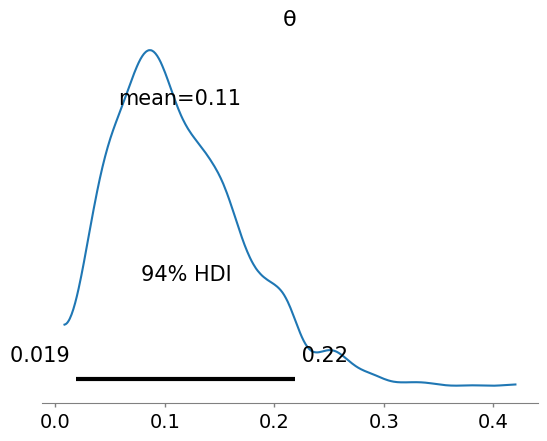

In [32]:
az.plot_posterior(idata_FT)

we can compare it to the analytic solution

<Axes: >

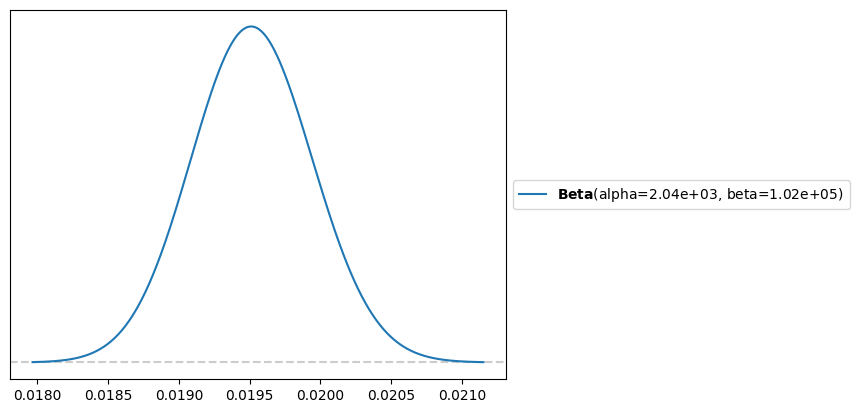

In [33]:
analytic_FT.plot_pdf()

###Predicting the Probability of a Student being a Piano Major


In [42]:
FT_data_2324 = np.repeat([1,0], repeats = [3,22])

In [51]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 2017. , beta = 104465.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

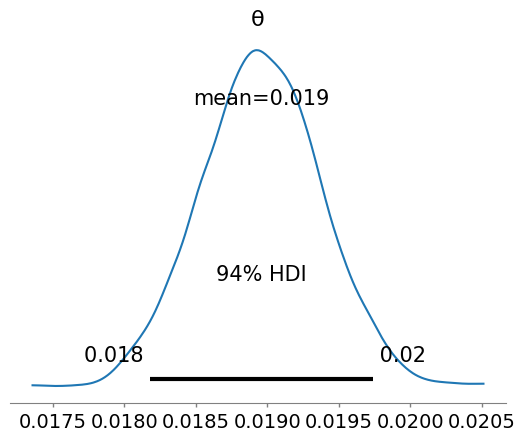

In [52]:
az.plot_posterior(idata_FT_2324)

In [53]:
pm.sample_posterior_predictive(idata_FT_2324, model=wmby_FT_2324_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [54]:
stacked_FT_2324 = az.extract(idata_FT_2324, group="posterior_predictive")

In [55]:
stacked_FT_2324.sel(sample=0).sel(draw=0).y.to_series().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

###Final Results!

As we see from the graphs, the likely chance of a person being a piano major is extremely small, about 1.9%.

We can predict that this will be the percent chance of a person being a piano major for the upcoming years too because this percent is pretty consistent between the years.